In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import re

# Load the dataset
file_path = '/Users/pintoza/Desktop/dev/data-science/walmart-proximity/data/processed/final_cleaned_time_distance_sample.csv' 
data = pd.read_csv(file_path)

In [112]:
data

,origin,destination,ruca,great_circle_distance,driving_time,driving_distance
0,"43.732427,-95.512519","43.636649,-95.601922",Suburban,7.984197,15.0,11.411478
1,"47.152347,-122.079177","47.16137,-122.288701",Urban,9.863802,25.0,15.126656
2,"38.841819,-89.877841","38.777672,-89.958568",Urban,6.207603,14.0,8.018171
3,"40.590853,-74.314688","40.519753,-74.393444",Urban,6.420742,18.0,8.714107
4,"27.019741,-82.123194","27.034598,-82.217057",Urban,5.867554,15.0,6.888519
...,...,...,...,...,...,...
3933,"42.4511,-79.415421","42.453861,-79.313252",Suburban,5.212038,15.0,6.820789
3934,"43.590548,-87.85532","43.715136,-87.755227",Suburban,9.956873,17.0,12.101822
3935,"40.869978,-73.844903","40.81411,-74.013489",Urban,9.620410,35.0,15.780959
3936,"41.112548,-85.203895","41.128576,-85.138477",Urban,3.580567,11.0,6.140388


In [113]:
# Basic info and statistics
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3938 entries, 0 to 3937
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   origin                 3938 non-null   object 
 1   destination            3938 non-null   object 
 2   ruca                   3938 non-null   object 
 3   great_circle_distance  3938 non-null   float64
 4   driving_time           3936 non-null   float64
 5   driving_distance       3936 non-null   float64
dtypes: float64(3), object(3)
memory usage: 184.7+ KB
None
       great_circle_distance  driving_time  driving_distance
count            3938.000000   3936.000000       3936.000000
mean                6.287485     15.480691          8.903194
std                 2.583448      6.553786          4.122705
min                 0.000000      1.000000          0.000000
25%                 4.330016     11.000000          5.980541
50%                 6.783652     15.000000          9

/opt/homebrew/Caskroom/miniconda/base/envs/walmart/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/Caskroom/miniconda/base/envs/walmart/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/Caskroom/miniconda/base/envs/walmart/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


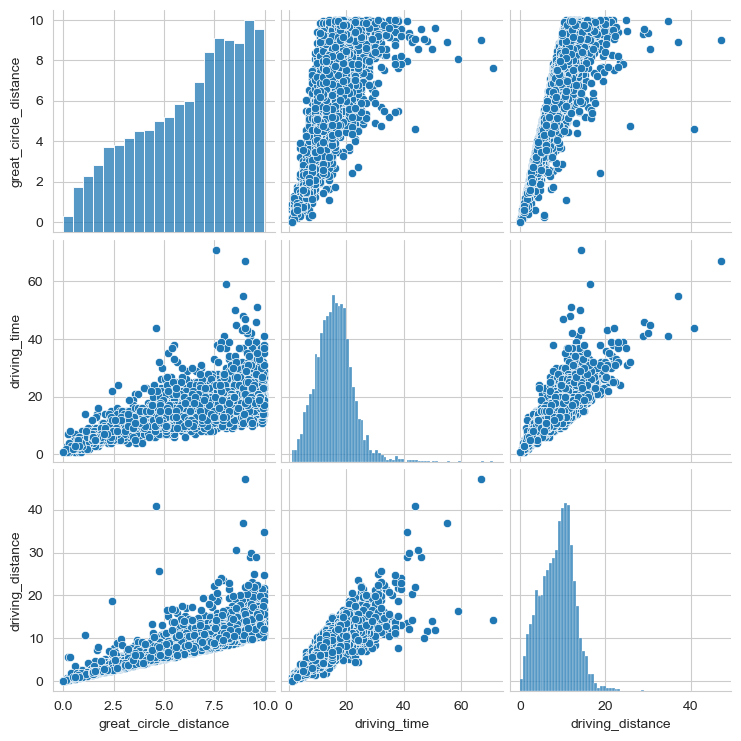

In [114]:
# Visualizing the relationships
sns.pairplot(data)
plt.show()

In [115]:
# Correlation between great circle distance and driving time
data[['great_circle_distance', 'driving_time']].corr()

,great_circle_distance,driving_time
great_circle_distance,1.000000,0.717197
driving_time,0.717197,1.000000


In [116]:
# Correlation between great circle distance and driving distance
data[['great_circle_distance', 'driving_distance']].corr()

,great_circle_distance,driving_distance
great_circle_distance,1.000000,0.857345
driving_distance,0.857345,1.000000


In [117]:
# Correlation between driving time and driving distance
data[['driving_time', 'driving_distance']].corr()

,driving_time,driving_distance
driving_time,1.000000,0.828214
driving_distance,0.828214,1.000000


In [118]:
# Filter out data where driving distance is greater than 23
filtered_data = data[(data['driving_distance']) < 20]

# Filter out data where driving time is greater than 40
filtered_data = filtered_data[(filtered_data['driving_time']) < 35]

data = filtered_data
data

,origin,destination,ruca,great_circle_distance,driving_time,driving_distance
0,"43.732427,-95.512519","43.636649,-95.601922",Suburban,7.984197,15.0,11.411478
1,"47.152347,-122.079177","47.16137,-122.288701",Urban,9.863802,25.0,15.126656
2,"38.841819,-89.877841","38.777672,-89.958568",Urban,6.207603,14.0,8.018171
3,"40.590853,-74.314688","40.519753,-74.393444",Urban,6.420742,18.0,8.714107
4,"27.019741,-82.123194","27.034598,-82.217057",Urban,5.867554,15.0,6.888519
...,...,...,...,...,...,...
3932,"38.777675,-81.364262","38.797775,-81.350381",Suburban,1.577207,5.0,2.338840
3933,"42.4511,-79.415421","42.453861,-79.313252",Suburban,5.212038,15.0,6.820789
3934,"43.590548,-87.85532","43.715136,-87.755227",Suburban,9.956873,17.0,12.101822
3936,"41.112548,-85.203895","41.128576,-85.138477",Urban,3.580567,11.0,6.140388


In [119]:
# Correlation between great circle distance and driving time
data[['great_circle_distance', 'driving_time']].corr()

,great_circle_distance,driving_time
great_circle_distance,1.000000,0.762308
driving_time,0.762308,1.000000


In [120]:
# Correlation between great circle distance and driving distance
data[['great_circle_distance', 'driving_distance']].corr()

,great_circle_distance,driving_distance
great_circle_distance,1.000000,0.904423
driving_distance,0.904423,1.000000


In [121]:
# Correlation between driving time and driving distance
data[['driving_time', 'driving_distance']].corr()

,driving_time,driving_distance
driving_time,1.000000,0.838723
driving_distance,0.838723,1.000000


/opt/homebrew/Caskroom/miniconda/base/envs/walmart/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/Caskroom/miniconda/base/envs/walmart/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/Caskroom/miniconda/base/envs/walmart/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


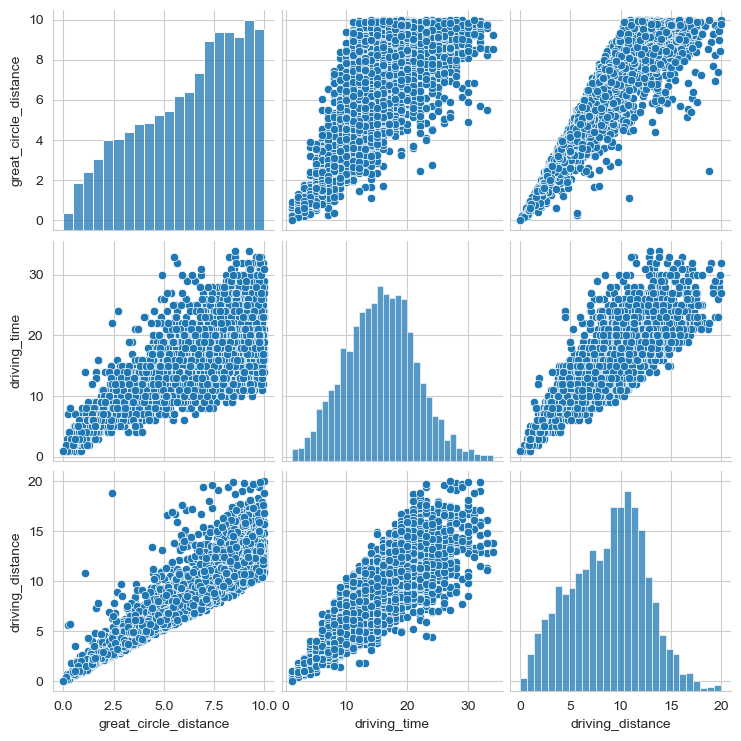

In [122]:
# Visualizing the relationships
sns.pairplot(data)
plt.show()

In [123]:
data_encoded = pd.get_dummies(data, columns=['ruca'])
data = data_encoded

In [124]:
data

,origin,destination,great_circle_distance,driving_time,driving_distance,ruca_Rural,ruca_Suburban,ruca_Urban
0,"43.732427,-95.512519","43.636649,-95.601922",7.984197,15.0,11.411478,False,True,False
1,"47.152347,-122.079177","47.16137,-122.288701",9.863802,25.0,15.126656,False,False,True
2,"38.841819,-89.877841","38.777672,-89.958568",6.207603,14.0,8.018171,False,False,True
3,"40.590853,-74.314688","40.519753,-74.393444",6.420742,18.0,8.714107,False,False,True
4,"27.019741,-82.123194","27.034598,-82.217057",5.867554,15.0,6.888519,False,False,True
...,...,...,...,...,...,...,...,...
3932,"38.777675,-81.364262","38.797775,-81.350381",1.577207,5.0,2.338840,False,True,False
3933,"42.4511,-79.415421","42.453861,-79.313252",5.212038,15.0,6.820789,False,True,False
3934,"43.590548,-87.85532","43.715136,-87.755227",9.956873,17.0,12.101822,False,True,False
3936,"41.112548,-85.203895","41.128576,-85.138477",3.580567,11.0,6.140388,False,False,True


In [125]:
# Including great circle distance in the model
X = data[['great_circle_distance', 'ruca_Rural', 'ruca_Suburban', 'ruca_Urban']]
y = data['driving_distance']

# Create the regression model
model = LinearRegression()
model.fit(X, y)

# Predict and calculate R-squared for the combined model
predictions = model.predict(X)
r_squared = r2_score(y, predictions)
print("R-squared with Great Circle Distance and RUCA classifications:", r_squared)

R-squared with Great Circle Distance and RUCA classifications: 0.8189722491677807


In [126]:
# Coefficients
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

# Intercept
print(f"Intercept: {model.intercept_}")

                       Coefficient
great_circle_distance     1.335168
ruca_Rural                0.017702
ruca_Suburban            -0.144439
ruca_Urban                0.126737
Intercept: 0.34598873463459157


In [127]:
# If you have a holdout test set or can perform cross-validation, do so here
from sklearn.model_selection import cross_val_score
cross_val_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print("Cross-validated R-squared scores:", cross_val_scores)

Cross-validated R-squared scores: [0.8123799  0.82292887 0.77641536 0.81889868 0.85858187]


In [128]:
from sklearn.linear_model import LinearRegression

X = data[['great_circle_distance', 'ruca_Rural', 'ruca_Suburban', 'ruca_Urban']]  # or any other predictors you want to include
y = data['driving_distance']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [129]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [130]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 2.730000940552155
R-squared: 0.8100327732137567


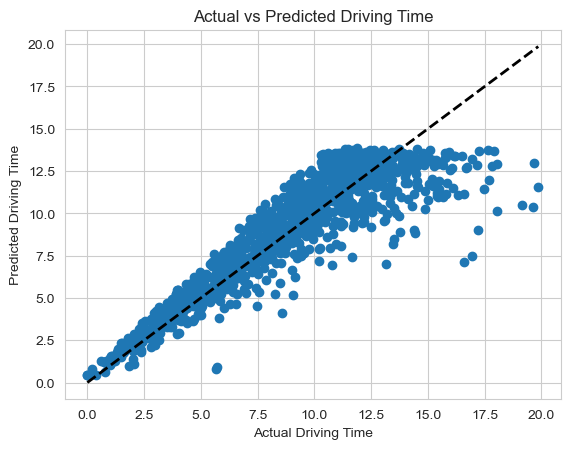

In [131]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Driving Time')
plt.ylabel('Predicted Driving Time')
plt.title('Actual vs Predicted Driving Time')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line
plt.show()

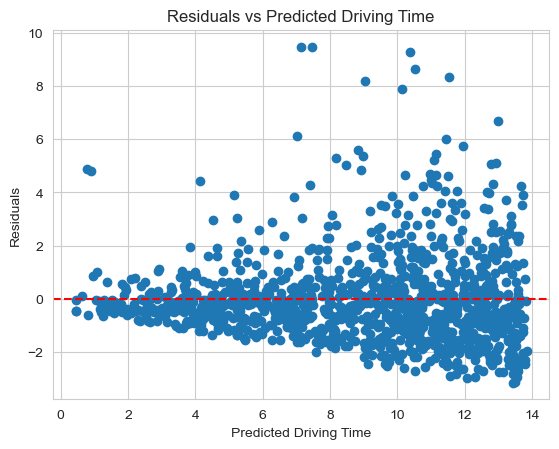

In [132]:
residuals = y_test - y_pred

plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Driving Time')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Driving Time')
plt.axhline(y=0, color='red', linestyle='--')
plt.show()

In [133]:
from sklearn.model_selection import cross_val_score

cross_val_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print("Cross-validated R-squared scores:", cross_val_scores)

Cross-validated R-squared scores: [0.8123799  0.82292887 0.77641536 0.81889868 0.85858187]
